# Credit Card Approval

In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import inf
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
%matplotlib inline

#### Import the datasets

In [89]:
application=pd.read_csv('archive/application_record.csv')
credit = pd.read_csv('archive/credit_record.csv')

In [90]:
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


### Get basic infomation about the application dataset

In [91]:
application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [92]:
application.nunique()

ID                     438510
CODE_GENDER                 2
FLAG_OWN_CAR                2
FLAG_OWN_REALTY             2
CNT_CHILDREN               12
AMT_INCOME_TOTAL          866
NAME_INCOME_TYPE            5
NAME_EDUCATION_TYPE         5
NAME_FAMILY_STATUS          5
NAME_HOUSING_TYPE           6
DAYS_BIRTH              16379
DAYS_EMPLOYED            9406
FLAG_MOBIL                  1
FLAG_WORK_PHONE             2
FLAG_PHONE                  2
FLAG_EMAIL                  2
OCCUPATION_TYPE            18
CNT_FAM_MEMBERS            13
dtype: int64

In [93]:
application.describe(include='O')

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
count,438557,438557,438557,438557,438557,438557,438557,304354
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,294440,275459,304074,226104,301821,299828,393831,78240


In [94]:
len(application.ID.unique())

438510

In [95]:
features = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 
 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS']

#### Remove duplicates and useless features.

In [96]:
application.drop_duplicates(subset=application.columns[1:],inplace=True)
# Drop constant feature
application.drop('FLAG_MOBIL', axis=1, inplace=True)

#### fill missing values

In [97]:
# Fill missing values
application['OCCUPATION_TYPE'].fillna(value='Other', inplace=True)
application.isna().sum()

ID                     0
CODE_GENDER            0
FLAG_OWN_CAR           0
FLAG_OWN_REALTY        0
CNT_CHILDREN           0
AMT_INCOME_TOTAL       0
NAME_INCOME_TYPE       0
NAME_EDUCATION_TYPE    0
NAME_FAMILY_STATUS     0
NAME_HOUSING_TYPE      0
DAYS_BIRTH             0
DAYS_EMPLOYED          0
FLAG_WORK_PHONE        0
FLAG_PHONE             0
FLAG_EMAIL             0
OCCUPATION_TYPE        0
CNT_FAM_MEMBERS        0
dtype: int64

In [98]:
application

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438541,6837707,M,N,Y,0,202500.0,Working,Higher education,Civil marriage,House / apartment,-13510,-2309,1,0,0,Laborers,2.0
438545,6839651,F,N,Y,3,99000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-18832,365243,0,0,0,Other,1.0
438547,6839917,F,N,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-10966,-2704,0,0,0,Other,2.0
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,0,0,0,Other,1.0


### Get basic infomation about the credit record dataset

In [99]:
credit.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [100]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


#### Here I choose users who overdue for more than 60 days as target risk users. Those samples are marked as '0', else are '1'.

In [101]:
credit["STATUS"] = credit["STATUS"].map({"X":1, "C":1, "0":1, "1":1, "2":0, "3":0, "4":0, "5":0})
credit

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,1
1,5001711,-1,1
2,5001711,-2,1
3,5001711,-3,1
4,5001712,0,1
...,...,...,...
1048570,5150487,-25,1
1048571,5150487,-26,1
1048572,5150487,-27,1
1048573,5150487,-28,1


In [102]:
credit_unique_id = pd.DataFrame(pd.unique(credit.ID),columns = ['ID'])
credit_unique_id

,ID
0,5001711
1,5001712
2,5001713
3,5001714
4,5001715
...,...
45980,5150482
45981,5150483
45982,5150484
45983,5150485


In [103]:
credit_unique_id['Max_Mnth_Good'] = [len(credit[(credit.ID == i) & (credit.STATUS == 1)]) for i in credit_unique_id.ID]
credit_unique_id['Max_Mnth_Bad'] = [len(credit[(credit.ID == i) & (credit.STATUS == 0)]) for i in credit_unique_id.ID]

In [104]:
credit_unique_id['Status'] = [1 if (credit_unique_id.Max_Mnth_Good.iloc[i] > credit_unique_id.Max_Mnth_Bad.iloc[i]) else 0 for i in range(len(credit_unique_id.ID))]

In [105]:
credit_unique_id.drop(['Max_Mnth_Good', 'Max_Mnth_Bad'], axis=1, inplace=True)
credit_unique_id

,ID,Status
0,5001711,1
1,5001712,1
2,5001713,1
3,5001714,1
4,5001715,1
...,...,...
45980,5150482,1
45981,5150483,1
45982,5150484,1
45983,5150485,1


In [106]:
credit_unique_id["Status"].value_counts()

1    45931
0       54
Name: Status, dtype: int64

In [107]:
credit_unique_id["Status"].value_counts()

1    45931
0       54
Name: Status, dtype: int64

### Merge both Dataframe

In [108]:
df = application.merge(credit_unique_id, how='inner', on=['ID'])
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,0,0,Other,2.0,1
1,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,0,0,0,Security staff,2.0,1
2,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,0,1,1,Sales staff,1.0,1
3,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,0,0,0,Other,1.0,1
4,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,Accountants,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,5148694,F,N,N,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,Municipal apartment,-20600,-198,0,0,0,Laborers,2.0,1
9705,5149055,F,N,Y,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15837,-2694,1,1,0,Other,2.0,1
9706,5149729,M,Y,Y,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-19101,-1721,0,0,0,Other,2.0,1
9707,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,0,1,1,Medicine staff,2.0,1


#### Exploratory Data Analysis

/Users/macbook/conda/envs/master/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

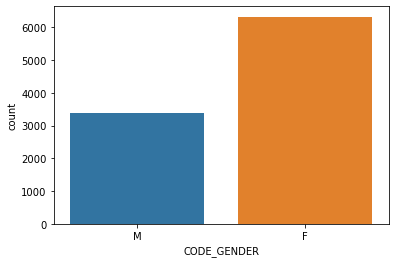

In [110]:
sns.countplot(df['CODE_GENDER'], data=df)

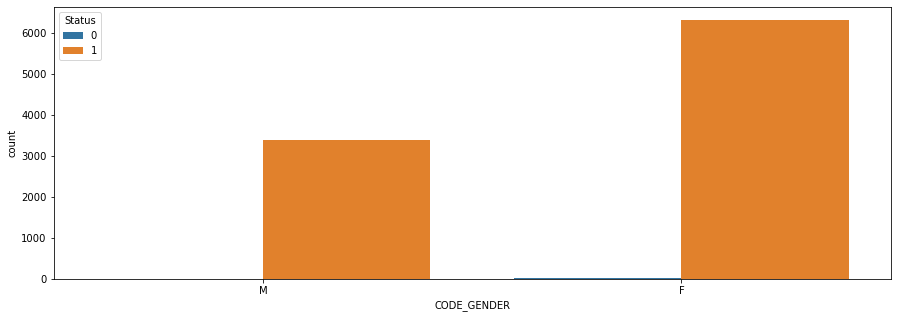

In [113]:
# Gender
plt.figure(figsize=(15,5))
sns.countplot(x='CODE_GENDER', hue='Status', data=df);
# More female are granted credit card compared to male. It can also be observed that it contains more female

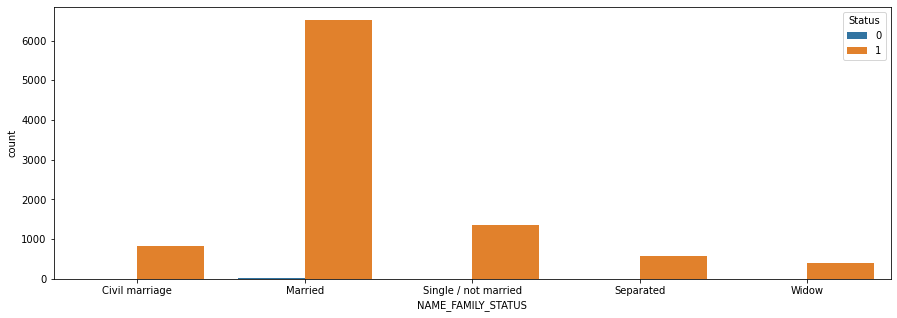

In [114]:
# Married
plt.figure(figsize=(15,5))
sns.countplot(x='NAME_FAMILY_STATUS', hue='Status', data=df);
# Married people have better chance of getting credit card

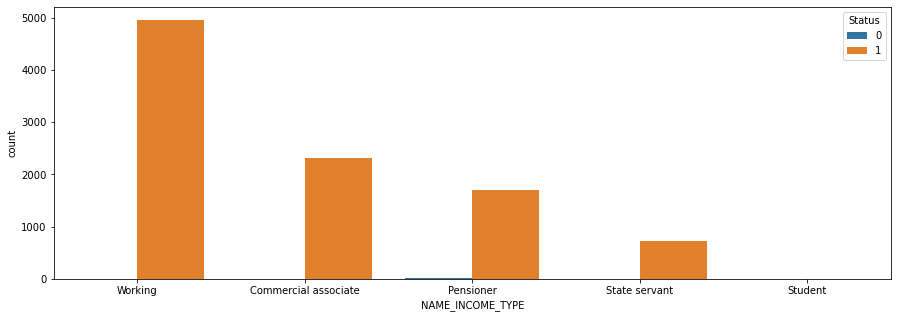

In [117]:
plt.figure(figsize=(15,5))
sns.countplot(x='NAME_INCOME_TYPE', hue='Status', data=df);

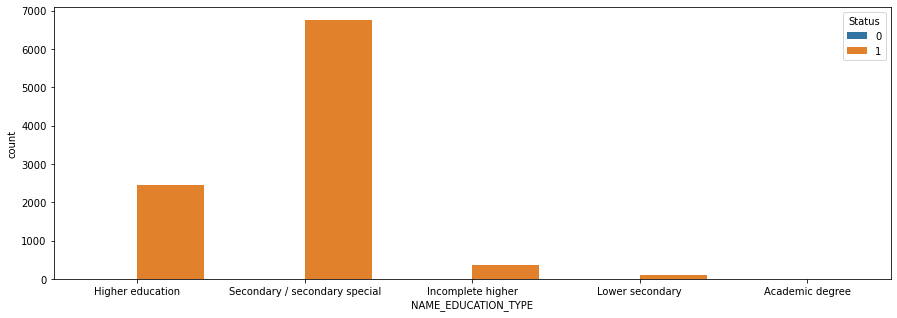

In [118]:
plt.figure(figsize=(15,5))
sns.countplot(x='NAME_EDUCATION_TYPE', hue='Status', data=df);

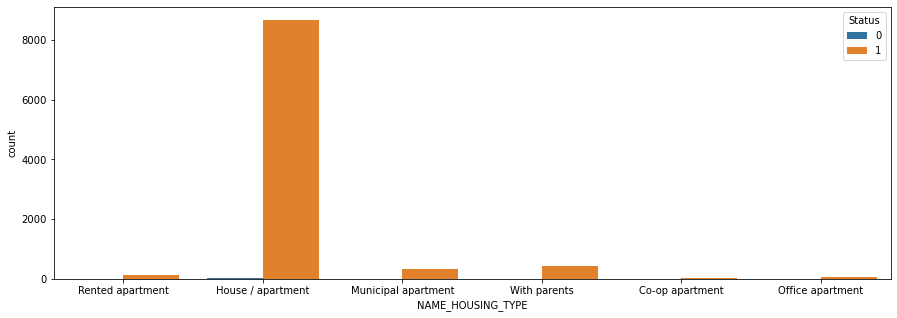

In [119]:
plt.figure(figsize=(15,5))
sns.countplot(x='NAME_HOUSING_TYPE', hue='Status', data=df);

/Users/macbook/conda/envs/master/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CNT_CHILDREN', ylabel='count'>

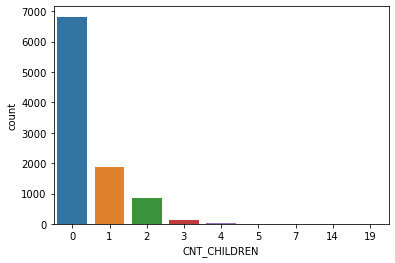

In [116]:
sns.countplot(df['CNT_CHILDREN'], data=df)

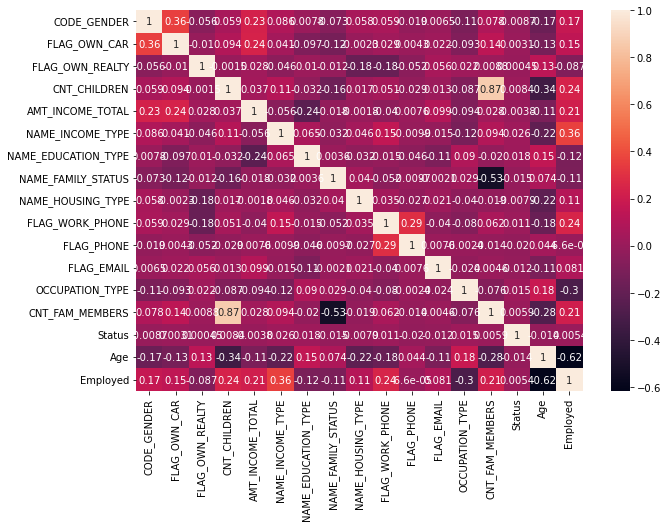

In [31]:
# Correlation
corr = df.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True);

#### Feature Engineering 

In [21]:
df["CODE_GENDER"] =  df["CODE_GENDER"].replace(['F','M'],[0,1])
df["FLAG_OWN_CAR"] = df["FLAG_OWN_CAR"].replace(["Y","N"],[1,0])
df["FLAG_OWN_REALTY"] = df["FLAG_OWN_REALTY"].replace(["Y","N"],[1,0])
df.loc[df['CNT_CHILDREN'] >= 3,'CNT_CHILDREN']=3 #"2More"

In [22]:
le = LabelEncoder()
for x in df:
    if df[x].dtypes=='object':
        df[x] = le.fit_transform(df[x])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9709 entries, 0 to 9708
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   9709 non-null   int64  
 1   CODE_GENDER          9709 non-null   int64  
 2   FLAG_OWN_CAR         9709 non-null   int64  
 3   FLAG_OWN_REALTY      9709 non-null   int64  
 4   CNT_CHILDREN         9709 non-null   int64  
 5   AMT_INCOME_TOTAL     9709 non-null   float64
 6   NAME_INCOME_TYPE     9709 non-null   int64  
 7   NAME_EDUCATION_TYPE  9709 non-null   int64  
 8   NAME_FAMILY_STATUS   9709 non-null   int64  
 9   NAME_HOUSING_TYPE    9709 non-null   int64  
 10  DAYS_BIRTH           9709 non-null   int64  
 11  DAYS_EMPLOYED        9709 non-null   int64  
 12  FLAG_WORK_PHONE      9709 non-null   int64  
 13  FLAG_PHONE           9709 non-null   int64  
 14  FLAG_EMAIL           9709 non-null   int64  
 15  OCCUPATION_TYPE      9709 non-null   i

In [24]:
df['Age']=-df['DAYS_BIRTH']//365

In [25]:
df['Employed']=1
df.loc[-df['DAYS_EMPLOYED']<0,'Employed']=0

In [26]:
# # Create years employed feature
# df['Years_employed']=-df['DAYS_EMPLOYED']//365
# df.loc[df['Years_employed']<0,'Years_employed']=0
# df

In [27]:
df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].astype(int)
df['CNT_FAM_MEMBERS'] = df['CNT_FAM_MEMBERS'].astype(int) 
df['Age'] = df['Age'].astype(int) 

In [28]:
df.drop('ID', axis=1, inplace=True)
df.drop('DAYS_BIRTH', axis=1, inplace=True)
df.drop('DAYS_EMPLOYED', axis=1, inplace=True)

#### Standardization on Numerical data (To convert them to Normal standard distribution)

In [29]:
num_lst=["AMT_INCOME_TOTAL"]
for i in num_lst:
    df[i] = np.log(df[i])

# df['CoapplicantIncome'] = df['CoapplicantIncome'].replace(-inf, 0)

In [30]:
df

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,Status,Age,Employed
0,1,1,1,0,12.965710,4,1,0,4,1,0,0,12,2,1,32,1
1,1,1,1,0,11.630709,4,4,1,1,0,0,0,17,2,1,58,1
2,0,0,1,0,12.506177,0,4,3,1,0,1,1,15,1,1,52,1
3,0,0,1,0,12.554967,1,1,2,1,0,0,0,12,1,1,61,0
4,1,1,1,0,12.506177,4,1,1,1,1,1,1,0,2,1,46,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,0,0,0,0,12.100712,1,4,0,2,0,0,0,8,2,1,56,1
9705,0,0,1,0,11.630709,0,4,1,1,1,1,0,12,2,1,43,1
9706,1,1,1,0,11.407565,4,4,1,1,0,0,0,12,2,1,52,1
9707,0,0,1,0,11.967181,1,1,1,1,0,1,1,11,2,1,33,1


### Train a model

In [32]:
X=df.drop('Status',axis=1)
y=df['Status']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

#### Handling imbalanced dataset
1. Oversampling
2. Undersampling
3. SMOTE

In [53]:
X_balance,Y_balance = SMOTE().fit_resample(X,y)
X_balance = pd.DataFrame(X_balance, columns = X.columns)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X_balance,Y_balance, 
                                                    stratify=Y_balance, test_size=0.3,
                                                    random_state = 10086)

In [78]:
classifiers = {
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier(),
    "XGBoost" : XGBClassifier()
}

In [79]:
train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    train_score = classifier.score(X_train, y_train)
    train_scores.append(train_score)

print(train_scores)


[0.9999262917373037, 0.9999262917373037, 0.9994840421611263]


In [82]:
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)

In [83]:
accuracy_score(y_test, y_pred)

0.9939810834049871

### Evaluation metric

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2908
           1       1.00      0.99      0.99      2907

    accuracy                           0.99      5815
   macro avg       0.99      0.99      0.99      5815
weighted avg       0.99      0.99      0.99      5815

